<a href="https://colab.research.google.com/github/Akshithaa25/Machine_Learning_502/blob/main/2348502_ML_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Invistico_Airline.csv')
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [5]:
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [6]:
df = df.drop(["Seat comfort","Inflight wifi service","Gate location","Cleanliness","Ease of Online booking","Arrival Delay in Minutes"], axis=1)

In [7]:
df.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Departure/Arrival time convenient    0
Food and drink                       0
Inflight entertainment               0
Online support                       0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Online boarding                      0
Departure Delay in Minutes           0
dtype: int64

In [8]:
df.describe()

,Age,Flight Distance,Departure/Arrival time convenient,Food and drink,Inflight entertainment,Online support,On-board service,Leg room service,Baggage handling,Checkin service,Online boarding,Departure Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1981.409055,2.990645,2.851994,3.383477,3.519703,3.465075,3.485902,3.695673,3.340807,3.352587,14.713713
std,15.119360,1027.115606,1.527224,1.443729,1.346059,1.306511,1.270836,1.292226,1.156483,1.260582,1.298715,38.071126
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,12.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000


<Axes: ylabel='Frequency'>

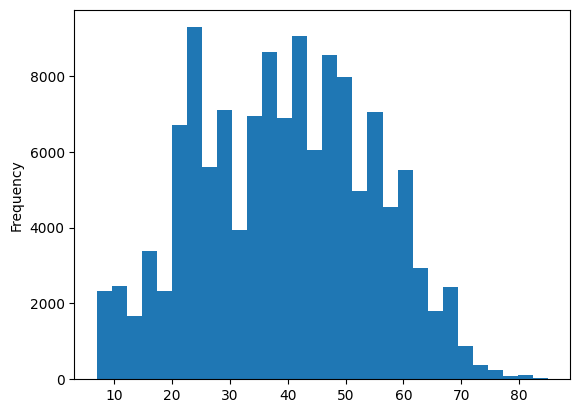

In [9]:
df['Age'].plot.hist(bins =30)

In [10]:
maxrange = int(np.ceil(max(df['Age'])))
minrange = int(np.floor(min(df['Age'])))
ageRange = maxrange -minrange
bins = 6
binwidth = int(np.round(ageRange/bins))

In [11]:
print(maxrange)
print(minrange)
print(ageRange)
print(binwidth)

85
7
78
13


In [12]:
intervals = [age for age in range (minrange , maxrange+binwidth , binwidth)]
intervals

[7, 20, 33, 46, 59, 72, 85]

In [13]:
df['Age_categorical']=pd.cut(df['Age'],bins = intervals, labels = None, include_lowest=True)

In [14]:
df['Age_categorical']

0          (59.0, 72.0]
1          (46.0, 59.0]
2         (6.999, 20.0]
3          (59.0, 72.0]
4          (59.0, 72.0]
              ...      
129875     (20.0, 33.0]
129876     (59.0, 72.0]
129877     (59.0, 72.0]
129878     (59.0, 72.0]
129879     (33.0, 46.0]
Name: Age_categorical, Length: 129880, dtype: category
Categories (6, interval[float64, right]): [(6.999, 20.0] < (20.0, 33.0] < (33.0, 46.0] <
                                           (46.0, 59.0] < (59.0, 72.0] < (72.0, 85.0]]

<Axes: xlabel='Age_categorical'>

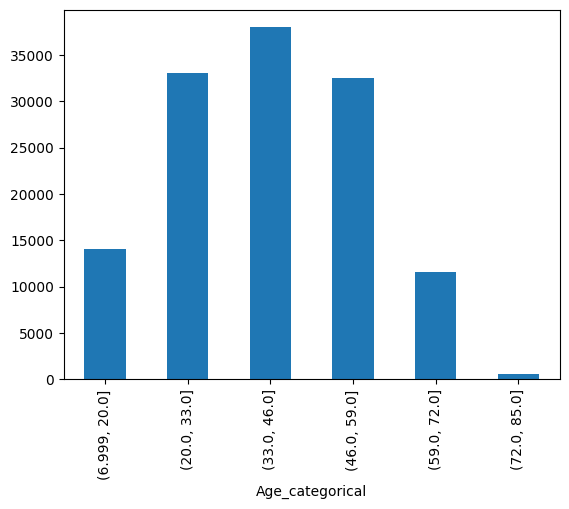

In [15]:
df.groupby('Age_categorical')['Age'].count().plot.bar()


One Hot Encoding

In [16]:
data = pd.get_dummies(df, columns=["satisfaction"])
data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Food and drink,Inflight entertainment,Online support,On-board service,Leg room service,Baggage handling,Checkin service,Online boarding,Departure Delay in Minutes,Age_categorical,satisfaction_dissatisfied,satisfaction_satisfied
0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,4,2,3,0,3,5,2,0,"(59.0, 72.0]",0,1
1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,2,2,4,4,4,2,2,310,"(46.0, 59.0]",0,1
2,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,2,3,3,4,4,2,0,"(6.999, 20.0]",0,1
3,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,4,3,1,0,1,4,3,0,"(59.0, 72.0]",0,1
4,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,3,4,2,0,2,4,5,0,"(59.0, 72.0]",0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,2,3,3,4,4,2,0,"(20.0, 33.0]",0,1
129876,Male,disloyal Customer,63,Personal Travel,Business,2087,3,2,1,1,2,3,3,1,1,174,"(59.0, 72.0]",1,0
129877,Male,disloyal Customer,69,Personal Travel,Eco,2320,0,3,2,2,4,3,4,2,2,155,"(59.0, 72.0]",1,0
129878,Male,disloyal Customer,66,Personal Travel,Eco,2450,2,3,2,2,3,2,3,2,2,193,"(59.0, 72.0]",1,0


In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# df['Class-num'] = label_encoder.fit_transform(df['Class	'])
df['Satisfaction-num'] = label_encoder.fit_transform(df['satisfaction'])
df['Customer Type-num'] = label_encoder.fit_transform(df['Customer Type'])

In [91]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Food and drink,Inflight entertainment,Online support,On-board service,Leg room service,Baggage handling,Checkin service,Online boarding,Departure Delay in Minutes,Age_categorical,Satisfaction-num,Customer Type-num
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,4,2,3,0,3,5,2,0,"(59.0, 72.0]",1,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,2,2,4,4,4,2,2,310,"(46.0, 59.0]",1,0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,2,3,3,4,4,2,0,"(6.999, 20.0]",1,0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,4,3,1,0,1,4,3,0,"(59.0, 72.0]",1,0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,3,4,2,0,2,4,5,0,"(59.0, 72.0]",1,0


In [18]:
df = df.drop(["satisfaction","Customer Type"], axis=1)

In [19]:
df['Type of Travel-num'] = label_encoder.fit_transform(df['Type of Travel'])

In [20]:
df['Gender-num'] = label_encoder.fit_transform(df['Gender'])

In [21]:
df

,Gender,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Food and drink,Inflight entertainment,Online support,On-board service,Leg room service,Baggage handling,Checkin service,Online boarding,Departure Delay in Minutes,Age_categorical,Satisfaction-num,Customer Type-num,Type of Travel-num,Gender-num
0,Female,65,Personal Travel,Eco,265,0,0,4,2,3,0,3,5,2,0,"(59.0, 72.0]",1,0,1,0
1,Male,47,Personal Travel,Business,2464,0,0,2,2,4,4,4,2,2,310,"(46.0, 59.0]",1,0,1,1
2,Female,15,Personal Travel,Eco,2138,0,0,0,2,3,3,4,4,2,0,"(6.999, 20.0]",1,0,1,0
3,Female,60,Personal Travel,Eco,623,0,0,4,3,1,0,1,4,3,0,"(59.0, 72.0]",1,0,1,0
4,Female,70,Personal Travel,Eco,354,0,0,3,4,2,0,2,4,5,0,"(59.0, 72.0]",1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Female,29,Personal Travel,Eco,1731,5,5,5,2,3,3,4,4,2,0,"(20.0, 33.0]",1,1,1,0
129876,Male,63,Personal Travel,Business,2087,3,2,1,1,2,3,3,1,1,174,"(59.0, 72.0]",0,1,1,1
129877,Male,69,Personal Travel,Eco,2320,0,3,2,2,4,3,4,2,2,155,"(59.0, 72.0]",0,1,1,1
129878,Male,66,Personal Travel,Eco,2450,2,3,2,2,3,2,3,2,2,193,"(59.0, 72.0]",0,1,1,1


In [22]:
df = df.drop(["Type of Travel"], axis=1)

In [23]:
df

,Gender,Age,Class,Flight Distance,Departure/Arrival time convenient,Food and drink,Inflight entertainment,Online support,On-board service,Leg room service,Baggage handling,Checkin service,Online boarding,Departure Delay in Minutes,Age_categorical,Satisfaction-num,Customer Type-num,Type of Travel-num,Gender-num
0,Female,65,Eco,265,0,0,4,2,3,0,3,5,2,0,"(59.0, 72.0]",1,0,1,0
1,Male,47,Business,2464,0,0,2,2,4,4,4,2,2,310,"(46.0, 59.0]",1,0,1,1
2,Female,15,Eco,2138,0,0,0,2,3,3,4,4,2,0,"(6.999, 20.0]",1,0,1,0
3,Female,60,Eco,623,0,0,4,3,1,0,1,4,3,0,"(59.0, 72.0]",1,0,1,0
4,Female,70,Eco,354,0,0,3,4,2,0,2,4,5,0,"(59.0, 72.0]",1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Female,29,Eco,1731,5,5,5,2,3,3,4,4,2,0,"(20.0, 33.0]",1,1,1,0
129876,Male,63,Business,2087,3,2,1,1,2,3,3,1,1,174,"(59.0, 72.0]",0,1,1,1
129877,Male,69,Eco,2320,0,3,2,2,4,3,4,2,2,155,"(59.0, 72.0]",0,1,1,1
129878,Male,66,Eco,2450,2,3,2,2,3,2,3,2,2,193,"(59.0, 72.0]",0,1,1,1


Relationship between class and Satisfaction of the traveler

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             129880 non-null  object  
 1   Age                                129880 non-null  int64   
 2   Class                              129880 non-null  object  
 3   Flight Distance                    129880 non-null  int64   
 4   Departure/Arrival time convenient  129880 non-null  int64   
 5   Food and drink                     129880 non-null  int64   
 6   Inflight entertainment             129880 non-null  int64   
 7   Online support                     129880 non-null  int64   
 8   On-board service                   129880 non-null  int64   
 9   Leg room service                   129880 non-null  int64   
 10  Baggage handling                   129880 non-null  int64   
 11  Checkin service           

In [26]:
cross_table = pd.crosstab(df['Class'], df['Satisfaction-num'])
print(cross_table)


Satisfaction-num      0      1
Class                         
Business          18065  44095
Eco               35336  22973
Eco Plus           5392   4019


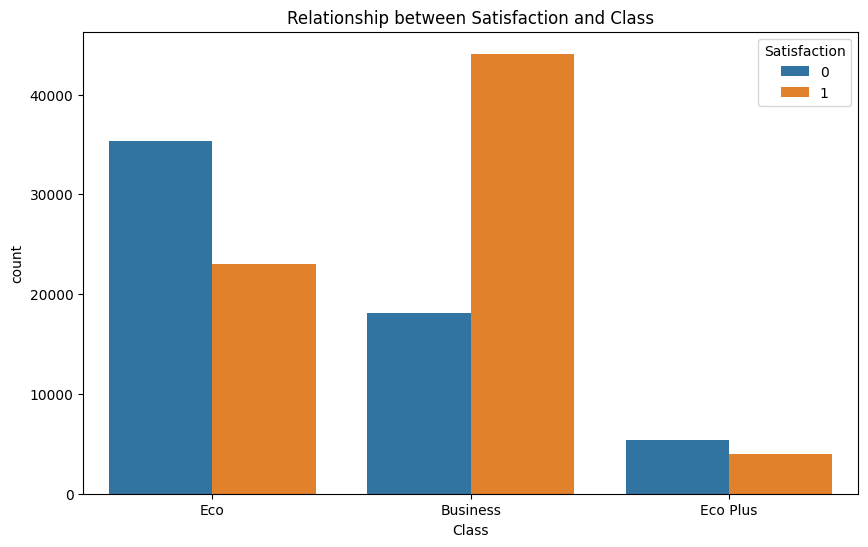

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Class', hue='Satisfaction-num')
plt.title("Relationship between Satisfaction and Class")
plt.legend(title="Satisfaction")
plt.show()

Heat map covariance matrix

In [28]:
cov_mat = np.cov(df['Gender-num'], df['Satisfaction-num'])
print(cov_mat)


[[ 0.2499474  -0.05281541]
 [-0.05281541  0.24776194]]


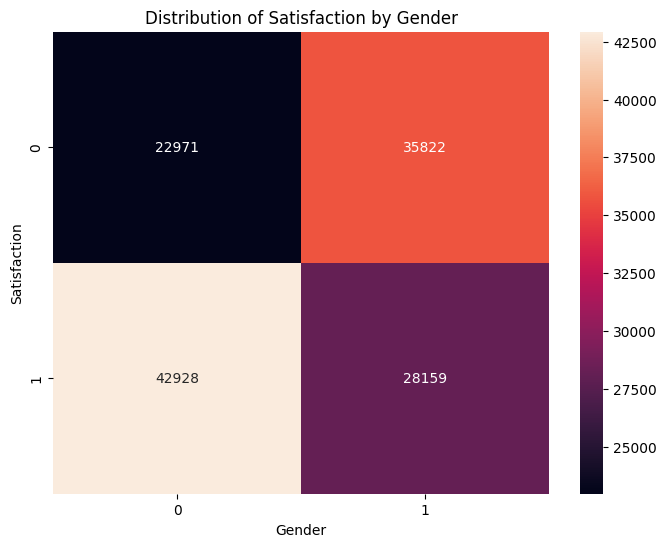

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(df['Satisfaction-num'], df['Gender-num']), annot=True, fmt='d')
plt.title("Distribution of Satisfaction by Gender")
plt.xlabel("Gender")
plt.ylabel("Satisfaction")
plt.show()

In [30]:
c_table=pd.crosstab(df['Satisfaction-num'], df['Gender-num'])

In [31]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(c_table)

print("Chi-square value:", chi2)
print("P-value:", p)

Chi-square value: 5849.476393129708
P-value: 0.0


In [32]:
value = 0.05
if p < value:
    print(" There is a significant association.")
else:
    print(" There is no significant association.")

 There is a significant association.


This  checks whether the calculated p-value is smaller than the chosen significance level. If it is, you reject the null hypothesis, suggesting a significant association between the variables being tested. If the p-value is not smaller than the significance level, you fail to reject the null hypothesis, suggesting no significant association.